In [24]:
import librosa
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
# Paths
dataset_path = r"C:/Users/USER/Desktop/Emotion Recognition/datasets/speech_dataset"

In [36]:
# Feature Extraction Function
def extract_features(file_path, max_pad_len=174):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        return mfccs
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

In [37]:
# Load Dataset
X, y = [], []
emotion_labels = os.listdir(dataset_path)
label_to_index = {label: i for i, label in enumerate(emotion_labels)}

for label in emotion_labels:
    folder_path = os.path.join(dataset_path, label)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        features = extract_features(file_path)
        if features is not None:
            X.append(features)
            y.append(label_to_index[label])

X = np.array(X)
y = to_categorical(y, num_classes=len(emotion_labels))

In [38]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from tensorflow.keras.layers import GlobalAveragePooling1D

# Model Architecture
model = Sequential([
    GlobalAveragePooling1D(input_shape=(40, 174)),  # Reduce the last dimension
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(emotion_labels), activation='softmax')
])


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\pooling\base_global_pooling.py:12: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
# Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.5403 - val_accuracy: 0.7875 - val_loss: 0.5984
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8180 - loss: 0.5333 - val_accuracy: 0.7964 - val_loss: 0.5480
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.5382 - val_accuracy: 0.7804 - val_loss: 0.6099
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: 0.5119 - val_accuracy: 0.7929 - val_loss: 0.5502
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8320 - loss: 0.4728 - val_accuracy: 0.7911 - val_loss: 0.5479
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.5326 - val_accuracy: 0.7911 - val_loss: 0.5896
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.5018 - val_accuracy: 0.8036 - val_loss: 0.5575
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8112 - loss: 0.5130 - val_accuracy: 0.8179 - v

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8642 - loss: 0.4070 - val_accuracy: 0.8304 - val_loss: 0.5410
Epoch 52/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8223 - loss: 0.4579 - val_accuracy: 0.8161 - val_loss: 0.5550
Epoch 53/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3716 - val_accuracy: 0.8161 - val_loss: 0.5496
Epoch 54/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8594 - loss: 0.4061 - val_accuracy: 0.8179 - val_loss: 0.5509
Epoch 55/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8501 - loss: 0.3882 - val_accuracy: 0.8357 - val_loss: 0.5195
Epoch 56/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8653 - loss: 0.3552 - val_accuracy: 0.8196 - val_loss: 0.5137
Epoch 57/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8690 - loss: 0.3675 - val_accuracy: 0.8143 - val_loss: 0.5322
Epoch 58/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3609 - val_accuracy: 0.8357 - val_lo

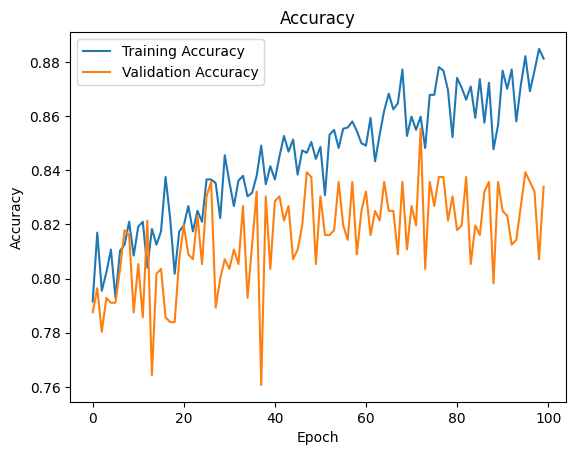

In [47]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

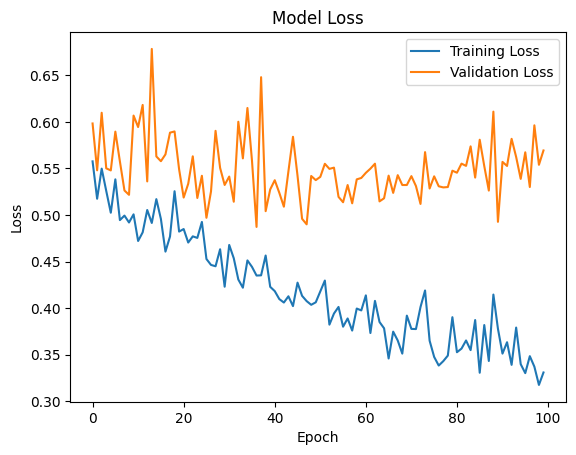

In [48]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
# Save the model to a file
model_save_path = "../backend/models/speech_emotion_model.h5"
model.save(model_save_path)

print(f"Model saved as {model_save_path}")

Model saved as ../backend/models/speech_emotion_model.h5
